In [1]:
import pandas as pd    # a wonderful dataframe to work with
import numpy as np     # adding a number of mathematical and science functions
import seaborn as sns  # a very easy to use statistical data visualization package
import matplotlib.pyplot as plt # a required plotting tool
import warnings
# sklearn is a big source of pre-written and mostly optimized ML algorithms.
# Here we use their Decision trees, Support Vector Machines, and the classic Perceptron. 
from sklearn import preprocessing, svm   
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier
#ignore warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('..\Downloads\stu_performance.csv')
data.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [3]:
gradeID_dict = {"G-01" : 1,
                "G-02" : 2,
                "G-03" : 3,
                "G-04" : 4,
                "G-05" : 5,
                "G-06" : 6,
                "G-07" : 7,
                "G-08" : 8,
                "G-09" : 9,
                "G-10" : 10,
                "G-11" : 11,
                "G-12" : 12}

data = data.replace({"GradeID" : gradeID_dict})

class_dict = {"L" : -1,
                "M" : 0,
                "H" : 1}
data = data.replace({"Class" : class_dict})

# Scale numerical fields
data["GradeID"] = preprocessing.scale(data["GradeID"])
data["raisedhands"] = preprocessing.scale(data["raisedhands"])
data["VisITedResources"] = preprocessing.scale(data["VisITedResources"])
data["AnnouncementsView"] = preprocessing.scale(data["AnnouncementsView"])
data["Discussion"] = preprocessing.scale(data["Discussion"])

# Use dummy variables for categorical fields
data = pd.get_dummies(data, columns=["gender",
                                     "NationalITy",
                                     "PlaceofBirth",
                                     "SectionID",
                                     "StageID",
                                     "Topic",
                                     "Semester",
                                     "Relation",
                                     "ParentAnsweringSurvey",
                                     "ParentschoolSatisfaction",
                                     "StudentAbsenceDays"])

# Show preprocessed data
data.head()

,GradeID,raisedhands,VisITedResources,AnnouncementsView,Discussion,Class,gender_F,gender_M,NationalITy_Egypt,NationalITy_Iran,...,Semester_F,Semester_S,Relation_Father,Relation_Mum,ParentAnsweringSurvey_No,ParentAnsweringSurvey_Yes,ParentschoolSatisfaction_Bad,ParentschoolSatisfaction_Good,StudentAbsenceDays_Above-7,StudentAbsenceDays_Under-7
0,-0.563838,-1.033429,-1.174075,-1.351167,-0.843326,0,0,1,0,0,...,1,0,1,0,0,1,0,1,0,1
1,-0.563838,-0.870813,-1.053029,-1.313549,-0.662225,0,0,1,0,0,...,1,0,1,0,0,1,0,1,0,1
2,-0.563838,-1.196046,-1.446426,-1.426401,-0.481125,-1,0,1,0,0,...,1,0,1,0,1,0,1,0,1,0
3,-0.563838,-0.545579,-0.901723,-1.238315,-0.300024,-1,0,1,0,0,...,1,0,1,0,1,0,1,0,1,0
4,-0.563838,-0.220346,-0.145191,-0.974994,0.243279,0,0,1,0,0,...,1,0,1,0,1,0,1,0,1,0


In [4]:
corr = data.corr()
corr.iloc[[5]]

,GradeID,raisedhands,VisITedResources,AnnouncementsView,Discussion,Class,gender_F,gender_M,NationalITy_Egypt,NationalITy_Iran,...,Semester_F,Semester_S,Relation_Father,Relation_Mum,ParentAnsweringSurvey_No,ParentAnsweringSurvey_Yes,ParentschoolSatisfaction_Bad,ParentschoolSatisfaction_Good,StudentAbsenceDays_Above-7,StudentAbsenceDays_Under-7
Class,0.071654,0.646298,0.677094,0.52737,0.308183,1.0,0.26349,-0.26349,-0.02631,-0.054841,...,-0.126239,0.126239,-0.401142,0.401142,-0.435495,0.435495,-0.375901,0.375901,-0.671312,0.671312


In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Load the dataset
Data = pd.read_csv('..\Downloads\stu_performance.csv')

# Define the features and target variable
X = data.drop('Class', axis=1)
y = data['Class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a RandomForestClassifier object
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
rfc.fit(X_train, y_train)

# Evaluate the model on the test data
accuracy = rfc.score(X_test, y_test)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8333333333333334


This code trains a Random Forest Classifier on a dataset of student performance, with the goal of predicting a student's class based on various features such as their age, sex, study time, and past failures.

The steps of the code are:

Load the dataset using pandas, which is stored in a CSV file called 'stu_performance.csv'.
Define the features (all columns except 'Class') and target variable ('Class').
Split the data into training and testing sets using train_test_split from sklearn.model_selection. The testing set is 20% of the original data.
Create a RandomForestClassifier object with 100 estimators and a random state of 42.
Train the model on the training data using rfc.fit.
Evaluate the model's accuracy on the testing data using rfc.score and store the result in a variable called accuracy.
Print the accuracy of the model on the test set.
The output of the code is the accuracy of the model on the test set.

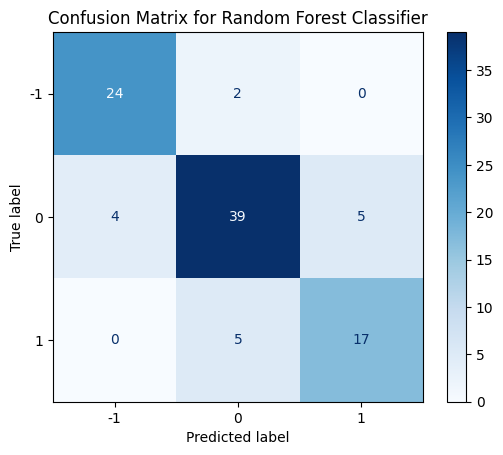

In [11]:
from sklearn.metrics import plot_confusion_matrix

# Predict the test data using the trained model
y_pred = rfc.predict(X_test)

# Create the confusion matrix plot
plot_confusion_matrix(rfc, X_test, y_test, cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Random Forest Classifier")
plt.show()

This code is creating a confusion matrix plot for the predictions made by the trained random forest classifier model on the test data.

First, the predict method of the trained model is used to predict the target variable values for the test data, and the predictions are stored in the y_pred variable.

Then, the plot_confusion_matrix function from sklearn.metrics is used to create a confusion matrix plot for the test data. The function takes the trained model, test feature data (X_test), and the true target values for the test data (y_test) as input, and creates a plot of the confusion matrix. The colormap used for the plot is set to plt.cm.Blues.

Finally, a title is added to the plot using the title function from matplotlib.pyplot, and the plot is displayed using the show function.



